![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [8]:
df_titanic.isna().sum()/len(df_titanic)*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [ ]:
#La columna "deck" tiene demasiados nulos, por lo que la vamos a eliminar.
#La columna "age" vamos a completarla con el valor medio
#La columna embark_town, vamos a completarla con la moda

In [9]:
df_titanic.drop(["deck","parch"], axis = 1, inplace = True)
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode())

In [11]:
df_titanic.head(3)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| surived       | variable binaria que indica si la persona sobrevivió |
| pclass       | clase económica en la que viajaba el pasajero|
| sex       | sexo del pasajero |
| age       | edad del pasajero |
| sibsp       | número de familiares a bordo |
| fare       | precio que pagó por el billete |
| embarked       | equivalente a embark town |
| class       | equivalente a pcclass pero en texto |
| who       | equivalente a sex |
| adult_male       | si era un hombre adulto |
| alive       | si el pasajero sigue vivo en la actualidad |
| alone       | si el pasajero viajaba solo |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [ ]:
#Vienen en el dataframe como otra columna. Son Southampton, Cherbourg y Queenstown

In [12]:
df_titanic.drop("embark_town", axis = 1, inplace = True)

def cambio_ciudad(letra):
  if letra == "S":
    return "Southampton"
  elif letra =="Q":
    return "Queenstown"
  elif letra =="C":
    return "Cherbourg"

In [13]:
df_titanic["embarked"] = df_titanic["embarked"].apply(cambio_ciudad)

In [14]:
df_titanic["embarked"].value_counts()

,count
embarked,
Southampton,644
Cherbourg,168
Queenstown,77


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [17]:
df_titanic = df_titanic[["survived","who","age","fare","class","embarked","alone"]]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   who       891 non-null    object  
 2   age       891 non-null    float64 
 3   fare      891 non-null    float64 
 4   class     891 non-null    category
 5   embarked  889 non-null    object  
 6   alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(1), object(2)
memory usage: 36.8+ KB


In [44]:
#Convertimos survived a tipo bool:
df_titanic["survived"] = df_titanic["survived"].astype(bool)

In [45]:
#Creamos tres dataset para cada tipo de datos
categoricas = df_titanic.select_dtypes(["object","category"])
numericas = df_titanic.select_dtypes("number")
binarias = df_titanic.select_dtypes("bool")

In [46]:
for categorica in categoricas.columns:
  print("Valores de la variable", categorica)
  print(categoricas[categorica].value_counts())
  print()
  print("Valores relativos")
  print(categoricas[categorica].value_counts(True))
  print()
  print("---------------------")
  print()

Valores de la variable who
who
man      537
woman    271
child     83
Name: count, dtype: int64

Valores relativos
who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64

---------------------

Valores de la variable class
class
Third     491
First     216
Second    184
Name: count, dtype: int64

Valores relativos
class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

---------------------

Valores de la variable embarked
embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

Valores relativos
embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

---------------------



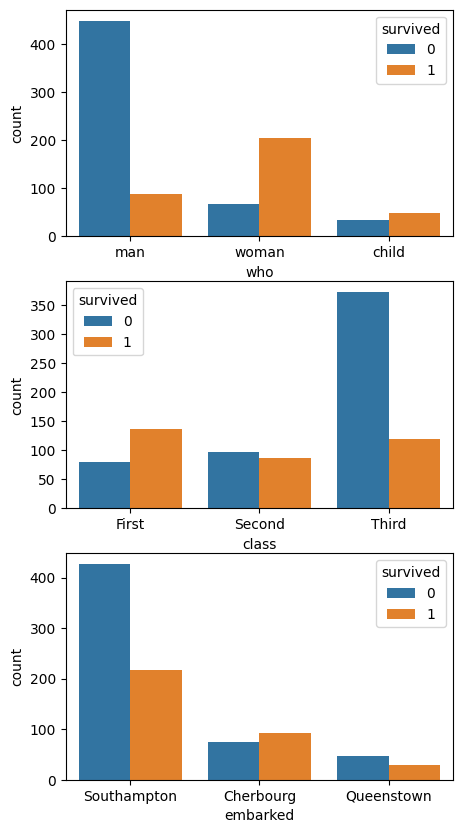

In [38]:
fig, ax = plt.subplots(3,1, figsize = (5,10))
for index, columna in enumerate(categoricas.columns):
  sns.countplot(data = df_titanic, x = columna, ax = ax[index], hue = df_titanic["survived"])

[]

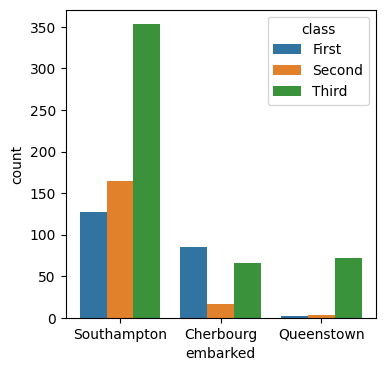

In [42]:
plt.figure(figsize=(4,4))
sns.countplot(data = df_titanic, x = "embarked", hue = "class")
plt.plot()

Del los gráficos anteriores se puede observar lo siguiente:  
- En el barco había más hombres viajando que mujeres. Aún así, se salvaron  más mujeres que hombres tanto de forma relativa como absoluta.  
-Había pocos niños, pero se salvaron en porcentaje relativo en mayor medida que los hombres
- Viajaban más personas en tercera clase que en las anteriores. Sin embargo,  se salvaron más personas de segunda y primera clase tanto de forma relativa como absoluta.  
- Embarcaron muchas más personas en Southampton. De forma relativa, se salvaron  más personas si embarcaban en Cherbourg. Esto puede deberse,  como se ve en el último gráfico, a que más personas de primera clase embarcaron en este puerto

### #2.2 Numéricas

In [51]:
numericas[df_titanic["survived"] == True].describe()

,age,fare
count,342.000000,342.000000
mean,28.549778,48.395408
std,13.772498,66.596998
min,0.420000,0.000000
25%,21.000000,12.475000
50%,29.699118,26.000000
75%,35.000000,57.000000
max,80.000000,512.329200


In [52]:
numericas[df_titanic["survived"] == False].describe()

,age,fare
count,549.000000,549.000000
mean,30.415100,22.117887
std,12.457370,31.388207
min,1.000000,0.000000
25%,23.000000,7.854200
50%,29.699118,10.500000
75%,35.000000,26.000000
max,74.000000,263.000000


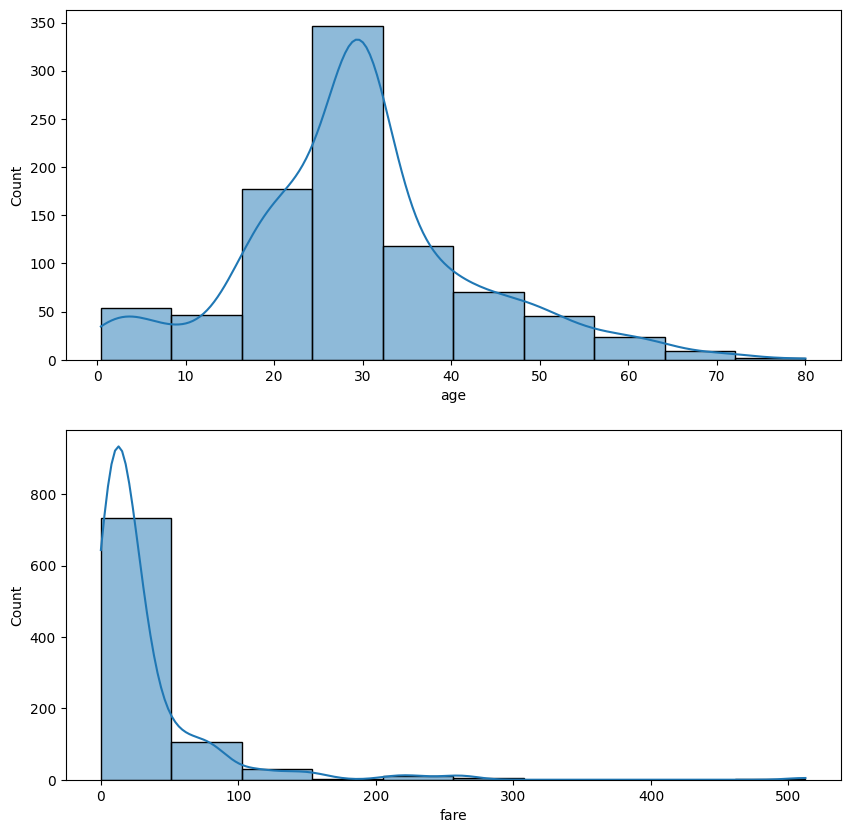

In [54]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
for index, columna in enumerate(numericas.columns):
  sns.histplot(data = df_titanic, x = columna, ax = ax[index], kde=True, bins = 10)

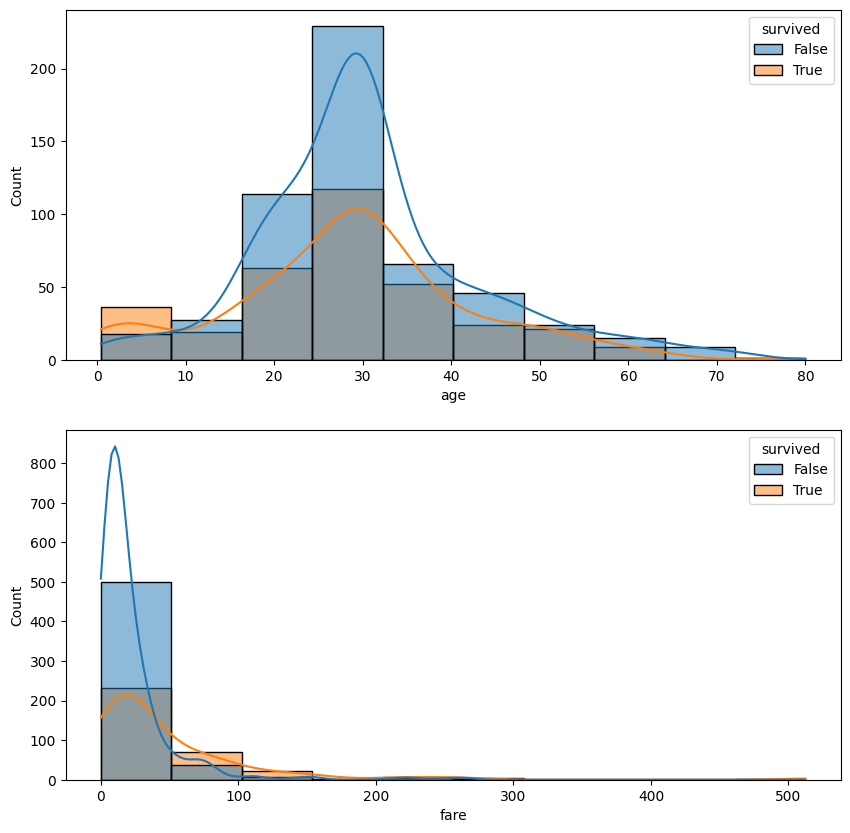

In [55]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
for index, columna in enumerate(numericas.columns):
  sns.histplot(data = df_titanic, x = columna, ax = ax[index], kde=True, hue = "survived", bins = 10)

De las variables numéricas se puede decir:
- El número de pasajeros se concentra en torno a los 25-30 años. La media de edad de la gente que sobrevive es menor que los que no sobreviven. Esto puede deberse al mayor porcentaje de niños que se salva, lo cual tambien puede verse en el gráfico al ser el único grupo en el que el color naranja queda por encima.
- La frecuencia del billete del billete pagado disminuye con el precio. Esto se corresponde con la distribuución de la categórica "Clase" visto antes. Al destacar el color naranja, se puede ver que la gente que ha pagado una mayor tarifa tiene mayor probabilidad de sobrevivir, lo que cuadra con lo observado en el analisis de las categoricas.

[]

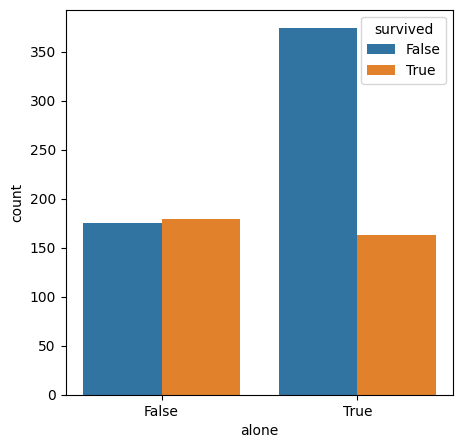

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_titanic, x = "alone", hue = "survived")
plt.plot()

[]

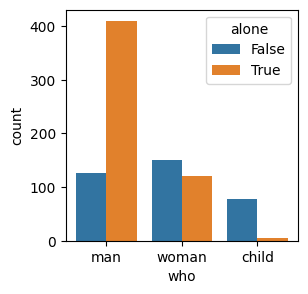

In [67]:
plt.figure(figsize=(3,3))
sns.countplot(data = df_titanic, x = "who", hue = "alone")
plt.plot()

Por último, analizando la variable booleana "alone", vamos que era más proabable sobrevivir si se viajaba con familia que solo. Esto realmente se debe a que los niños y las mujeres, que eran los que más sobrevivían,  no viajaban solos en mayor medida.